#Algerian Forest Fires Dataset

##About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.


Attributes (features):
* X: The X-axis coordinate of the fire location (integer)
* Y: The Y-axis coordinate of the fire location (integer)
* month: The month in which the fire occurred (categorical: 1 to 12)
* day: The day of the month when the fire occurred (categorical: 1 to 31)
* FFMC: Fine Fuel Moisture Code, a measure of the moisture content of fine fuels (numeric)
* DMC: Duff Moisture Code, a measure of the moisture content of duff (numeric)
* DC: Drought Code, a measure of the moisture content of deep, compacted fuels (numeric)
* ISI: Initial Spread Index, a measure of the potential for the fire to spread (numeric)
* temp: Temperature in Celsius (numeric)
* RH: Relative Humidity (numeric)
* wind: Wind speed (numeric)
* rain: Rainfall (numeric)
* area: Area burned by the fire (numeric, continuous, target variable)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv("/content/Algerian_forest_fires_dataset.csv")

In [5]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
n=0
for label , content in dataset.items():
  if not pd.api.types.is_numeric_dtype(content):
    n+= 1
print("number of features that don't numerical is : " ,n)


number of features that don't numerical is :  14


## Data cleaning

In [8]:
dataset.isnull().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
242,False
243,False
244,False
245,False


In [9]:
# Missing Values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset convert into two sets based on region from 122th index , we can make a new column based on region

1. `Bejaia Region dataset `
2. `Sidi-Bel Abbes Region Dataset`

Add new column with region

In [10]:
dataset.loc[122]

,122
day,NaN
month,NaN
year,NaN
Temperature,NaN
RH,NaN
Ws,NaN
Rain,NaN
FFMC,NaN
DMC,NaN
DC,NaN


In [11]:
dataset.loc[:122 , "Region"]= 0
dataset.loc[122: , "Region"]= 1
df=dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [13]:
# check again of any Missing Values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [14]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [16]:
df['Region']= df['Region'].astype(int)
df['Region'].dtypes

dtype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.1+ KB


In [18]:
df.shape

(247, 15)

In [19]:
# Removing The null Values
df = df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [20]:
# check shape after we remove all null values
df.shape

(244, 15)

In [23]:
# check again of any Missing Values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [24]:
df.isna().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [25]:
df.loc[122]

,122
day,day
month,month
year,year
Temperature,Temperature
RH,RH
Ws,Ws
Rain,Rain
FFMC,FFMC
DMC,DMC
DC,DC


In [26]:
df=df.drop(122).reset_index(drop=True)

In [27]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [28]:
# fix spaces in columns names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


### Changed the required columns as integer data type

In [30]:
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [32]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


### Changing the other columns to float DataTypes

In [35]:
# Finding the features that have object as dataype
for label , content in df.items():
  if  pd.api.types.is_object_dtype(content):
    print(label)

Rain
FFMC
DMC
DC
ISI
BUI
FWI
Classes


In [36]:
# store all objects into a array
objects = [features for features in df.columns if df[features].dtypes == 'O']

In [37]:
for i in objects:
  if i != 'Classes':
    df[i]= df[i].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [39]:
# Let's save this clean dataset
df.to_csv("/content/clean_Algerian_forest_fires_dataset.csv")

## Explore Data Analysis

In [48]:
df_copy= df.copy()

In [49]:
# drop unless inportance features Like Day , Month , year
df_copy.drop(['day', 'month' , 'year'], axis=1,inplace=True)

In [50]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [51]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


We see there more than 2 category there look the same but thre differentlike spaces or something lik that

In [52]:
# Encoding of the categories in classes
# df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)
# Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [58]:
# categories in classes
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [57]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [59]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


### Data Visualization

In [70]:
# Plot Density plot for all Features
plt.style.use('seaborn')
df_copy.hist(bins=50 , figsize=(20,15))
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

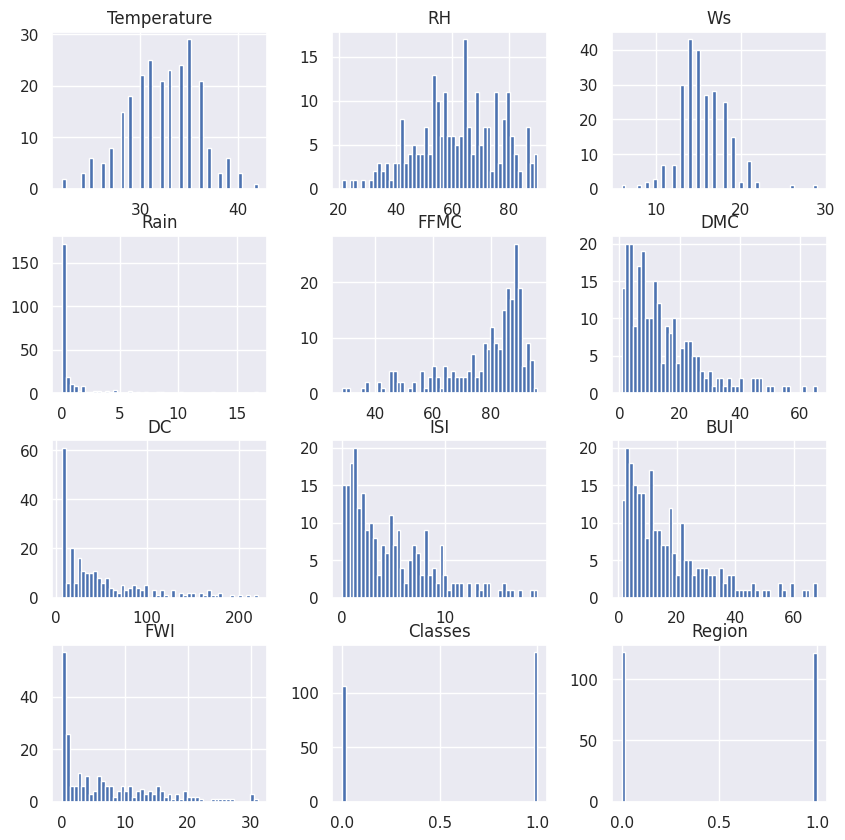

In [73]:
# Set the style to Seaborn using sns.set_theme()
sns.set_theme(style="darkgrid")

# OR Set the style to Seaborn using sns.set_style() with style='darkgrid'
# sns.set_style('darkgrid')

df_copy.hist(bins=50, figsize=(10, 10))
plt.show()

In [83]:
# Percentage  for Pie chart
percentage_var = df_copy['Classes'].value_counts(normalize=True)*100
percentage_var

,proportion
Classes,
1,56.378601
0,43.621399


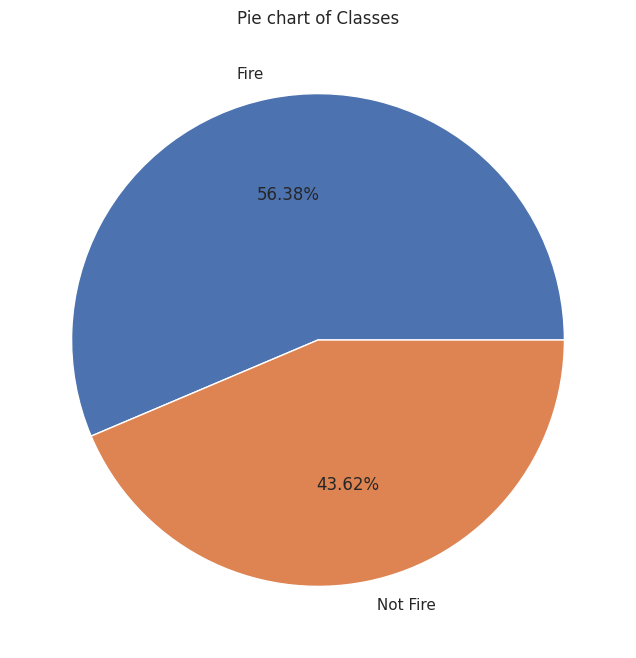

In [82]:
# Ploting Pie chart
plt.figure(figsize=(12,8))
plt.pie(percentage_var , labels=["Fire", " Not Fire"], autopct='%1.2f%%')
plt.title("Pie chart of Classes")
plt.show()

In [85]:
# Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

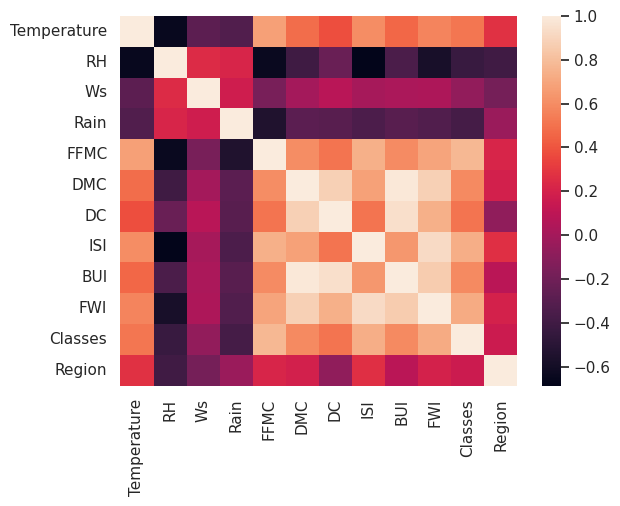

In [88]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

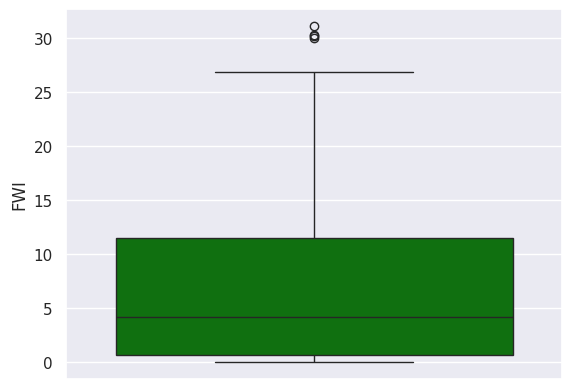

In [94]:
# Box Plots
sns.boxplot(data=df['FWI'], color='green')

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [96]:
# convert column classes into two classes
# Encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

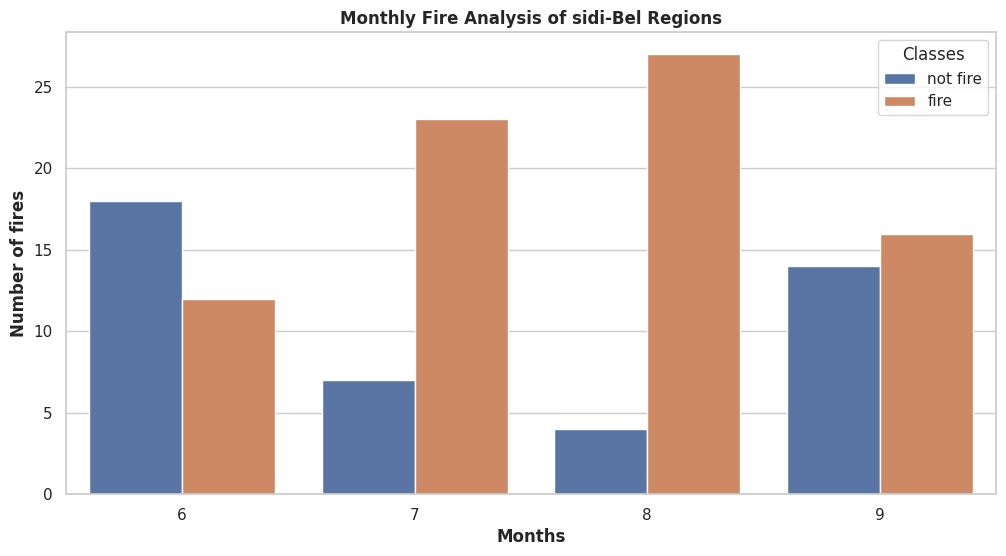

In [111]:
# Monthly Fire Analysis
# filter Reions
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month', data=dftemp, hue='Classes')
plt.ylabel("Number of fires" , weight='bold')
plt.xlabel("Months" , weight='bold')
plt.title("Monthly Fire Analysis of sidi-Bel Regions" , weight='bold')
plt.show()

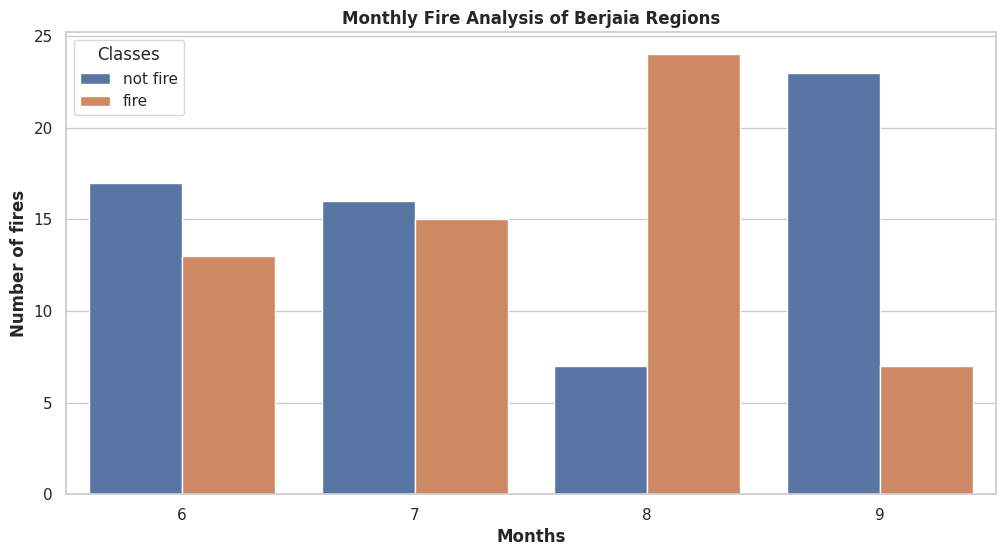

In [110]:
# Monthly Fire Analysis
# filter Reions
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month', data=dftemp, hue='Classes')
plt.ylabel("Number of fires" , weight='bold')
plt.xlabel("Months" , weight='bold')
plt.title("Monthly Fire Analysis of Berjaia Regions" , weight='bold')
plt.show()

In [115]:
df.loc[df['Region']==0]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0


## Model Training

In [117]:
clean_data = df.copy()
clean_data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [118]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [119]:
# drop unless importance features Like Day , Month , year
clean_data.drop(['day', 'month' , 'year'], axis=1,inplace=True)

In [120]:
clean_data['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [122]:
# convert classes column into binary dataType
# Encoding of the categories in classes
clean_data['Classes']=np.where(clean_data['Classes'].str.contains('not fire'),0,1)

In [125]:
clean_data['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [126]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [129]:
# check if our data is clean
clean_data.isna().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


### Split our data

In [131]:
# Independent and dependent Features
X= clean_data.drop('FWI', axis=1)
y= clean_data['FWI']

In [133]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [155]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [156]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

### Feature Selection

we Looking for highly  correlated features on negative can be important but positive we have to remove it fromour feature.


In [157]:
# Feature Selection Based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

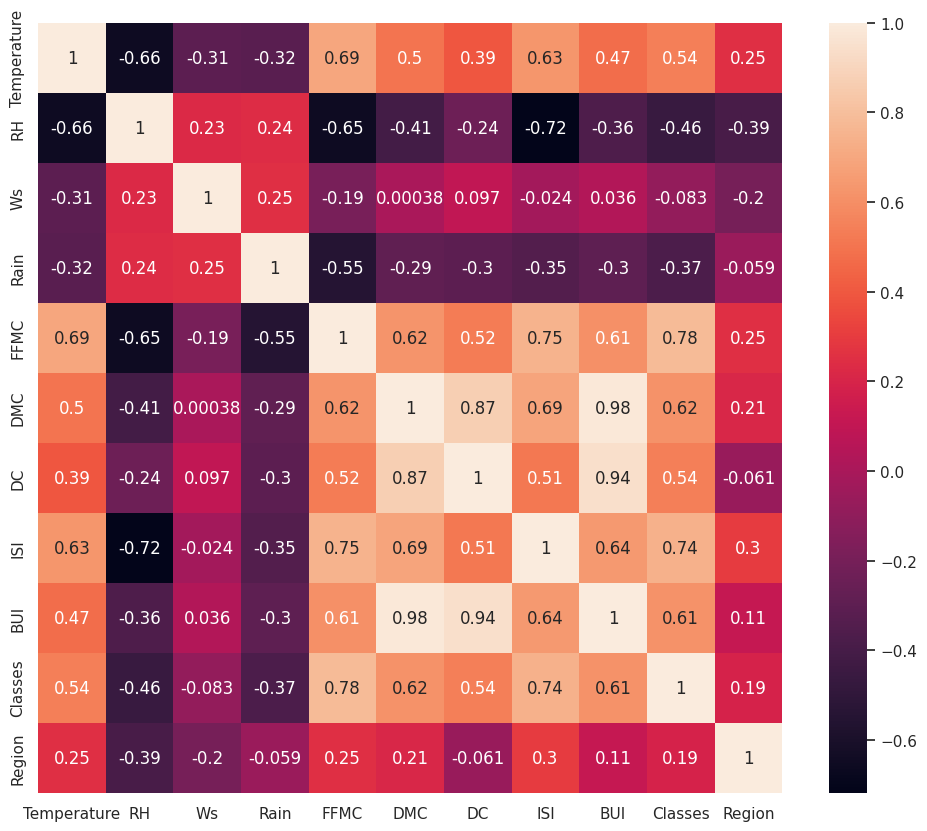

In [158]:
# Check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)

In [159]:
# len(X_train.corr().columns)
X_train.corr().iloc[1,1]

np.float64(1.0)

In [160]:
def correlation(datasets , threshold):
  col_corr = set()
  corr_matrix = datasets.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)

  return col_corr

In [161]:
# threshold --Domain expertise
corr_features = correlation(X_train , 0.85)
corr_features

{'BUI', 'DC'}

In [162]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features , axis=1, inplace=True)
X_test.drop(corr_features , axis=1, inplace=True)

In [163]:
X_train.shape , X_test.shape


((182, 9), (61, 9))

### Feature Scaling or Standardization

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071
...,...,...,...,...,...,...,...,...,...
177,-2.195553,1.317365,-0.219054,-0.196914,-2.286163,-1.096748,-1.069486,-1.104315,-0.989071
178,-1.113385,1.183793,0.540333,1.066320,-1.971876,-0.930289,-1.023186,-1.104315,-0.989071
179,-1.925011,0.916651,0.540333,2.984564,-2.209337,-1.065041,-1.069486,-1.104315,-0.989071
180,0.509868,-0.218705,0.160640,-0.384060,0.730997,0.377603,0.597325,0.905539,1.011050


####  Box Plots To understand Effect Of Standard Scaler


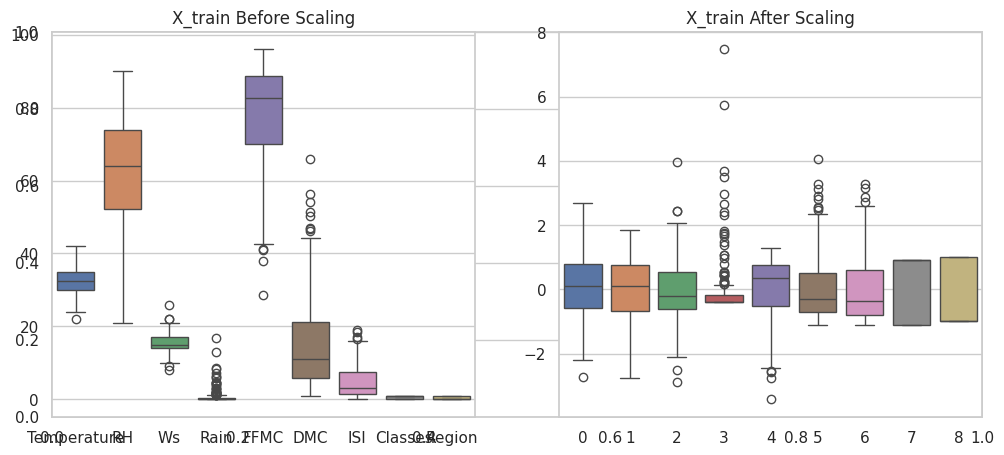

In [171]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")
plt.show()

### Linear Regression Model

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)

Mean Squared Error: 0.6742766873791607
R2 Score: 0.9847657384266951


Text(0.5, 1.0, 'Actual vs Predicted Values')

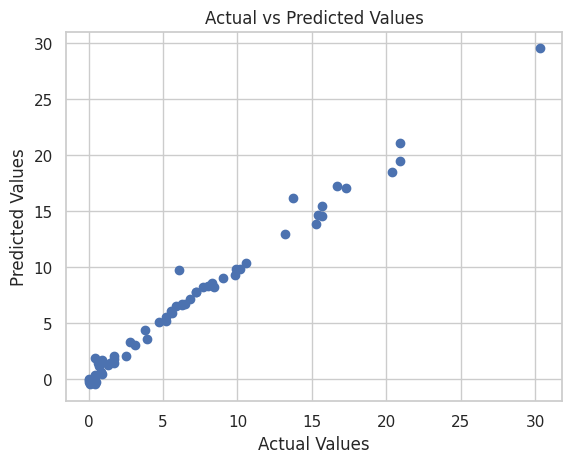

In [176]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

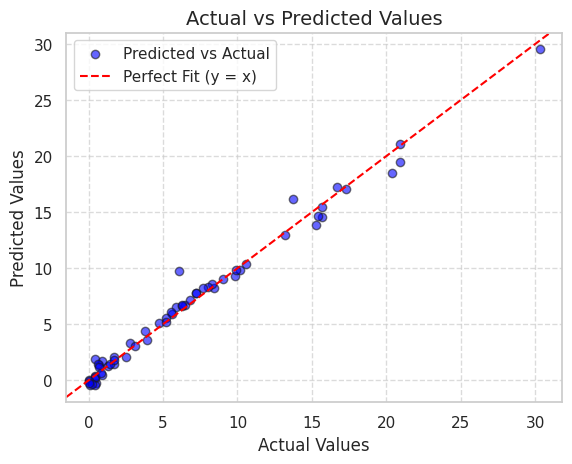

In [179]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k', label="Predicted vs Actual")
plt.xlabel("Actual Values", fontsize=12)  # Label for x-axis
plt.ylabel("Predicted Values", fontsize=12)  # Label for y-axis
plt.title("Actual vs Predicted Values", fontsize=14)  # Title
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', label="Perfect Fit (y = x)")  # y = x line
plt.legend()  # Show legend
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
plt.show()


#### Lasso Regression

Mean Squared Error: 2.2483458918974772
R2 Score: 0.9492020263112388


Text(0.5, 1.0, 'Actual vs Predicted Values Lasso Regression')

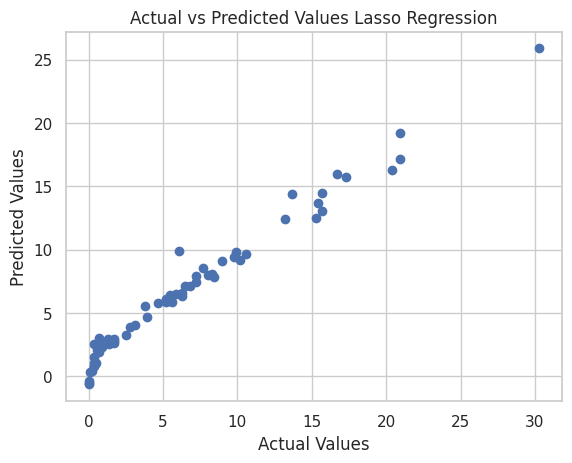

In [197]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
lassoreg = Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred = lassoreg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values Lasso Regression")

In [206]:
lassoreg.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.99025157,  4.00824747,  0.        , -0.        ])

In [188]:
# Try Lasso with Cross Validation Method
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(cv=5, random_state=0)
lassoregcv.fit(X_train_scaled,y_train)

LassoCV(cv=5, random_state=0)

In [192]:
lassoregcv.alpha_

np.float64(0.05725391318234408)

In [194]:
len(lassoregcv.alphas_)

100

Mean Squared Error: 2.2483458918974772
R2 Score: 0.9820946715928275


Text(0.5, 1.0, 'Actual vs Predicted Values LassoCv Regression')

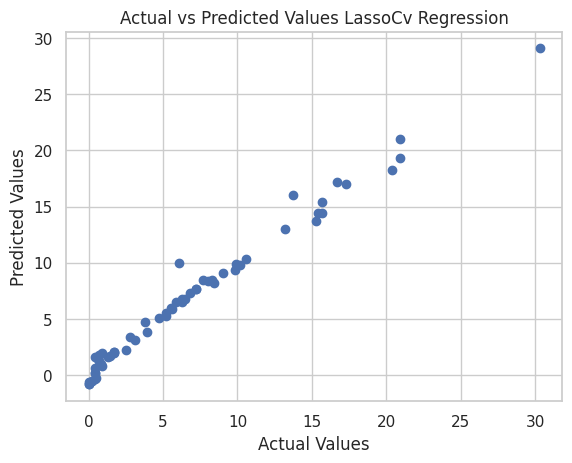

In [198]:
y_pred = lassoregcv.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values LassoCv Regression")

#### Ridge Regression

Mean Squared Error: 0.6949198918152074
R2 Score: 0.9842993364555513


Text(0.5, 1.0, 'Actual vs Predicted Values')

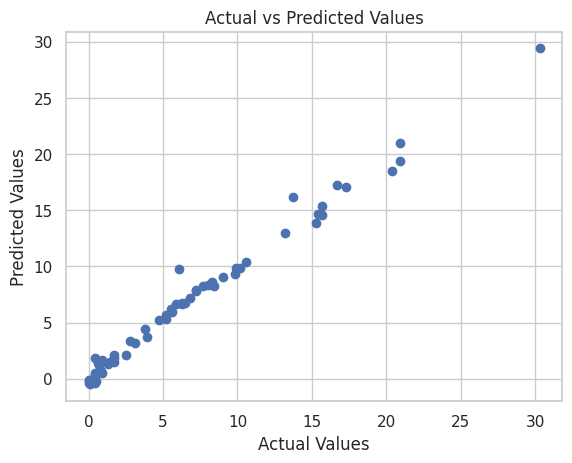

In [183]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
RidgeReg = Ridge()
RidgeReg.fit(X_train_scaled,y_train)
y_pred = RidgeReg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

Mean Squared Error: 0.6949198918152074
R2 Score: 0.9842993364555513


Text(0.5, 1.0, 'Actual vs Predicted Values')

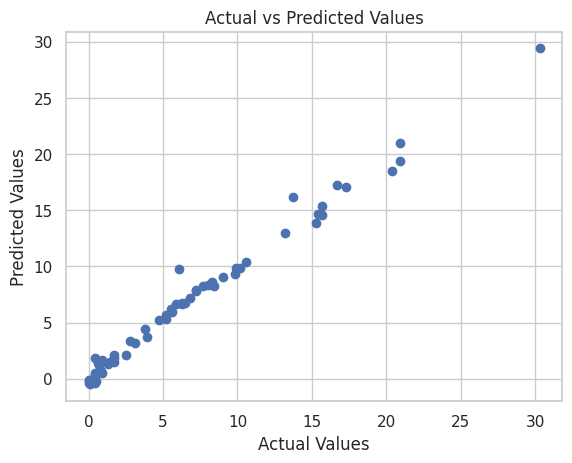

In [201]:
from sklearn.linear_model import RidgeCV
RidgeRegcv = RidgeCV(cv=5)
RidgeRegcv.fit(X_train_scaled,y_train)
y_pred = RidgeRegcv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

In [203]:
RidgeRegcv.alphas , RidgeRegcv.alpha_

((0.1, 1.0, 10.0), np.float64(1.0))

#### ElasticNet Regression

Mean Squared Error: 5.5172511010252245
R2 Score: 0.8753460589519703


Text(0.5, 1.0, 'Actual vs Predicted Values')

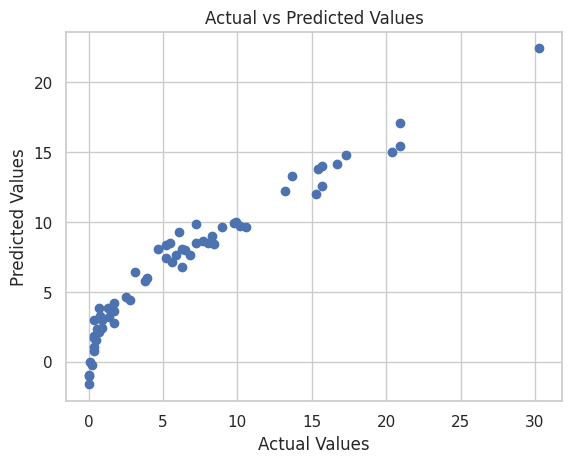

In [187]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error , r2_score
ElastcReg = ElasticNet()
ElastcReg.fit(X_train_scaled,y_train)
y_pred = ElastcReg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

Mean Squared Error: 0.8222830416276258
R2 Score: 0.9814217587854941


Text(0.5, 1.0, 'Actual vs Predicted Values')

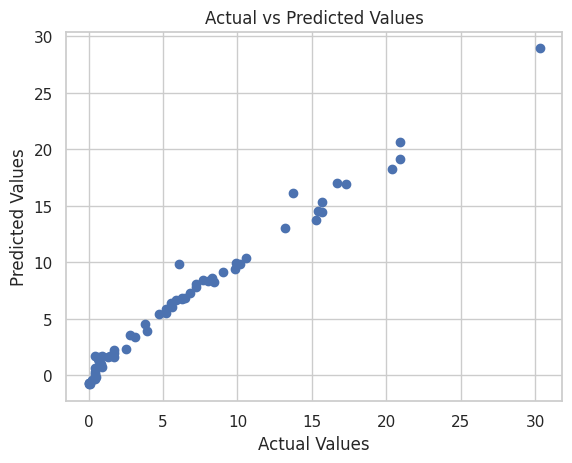

In [204]:
from sklearn.linear_model import ElasticNetCV
ElasticRegcv = ElasticNetCV(cv=5)
ElasticRegcv.fit(X_train_scaled,y_train)
y_pred = ElasticRegcv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")